# Introduction

Before you go on and build your model, there are some things that you need to apply to your dataset to make sure your model works well. This is called Data Preprocessing. Missing value treatment is one of them. Missing values are fields in your dataset whose values are, umm, okay, take a wild guess? Yeah, missing. No points to you for that. Missing values can arrive in your dataset for various reasons.
<br><br>
Say you're conducting an online survey to make your own dataset and you've got this nice form that you send to your friends and family and ask them to fill and share it around. After a while, you check the data your form captured and to your surprise, you find that there are many missing values. You analyze the data and see that there is a pattern. The missing values are mostly occuring in the fields which takes a lot of user's time. The problem is, if your form takes a lot of time, people will skip some fields, fields that are not compulsory or are lengthy to fill in.

There are more reasons for missing values but we won't discuss them here. We'll discuss means to overcome them.

Let's take an example into consideration. We'll work with Kaggle's Titanic dataset's train split in this notebook.

In [20]:
import pandas as pd
import numpy as np

In [22]:
titanic = pd.read_csv('titanic_train.csv')

In [25]:
titanic.shape

(891, 12)

In [23]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Hmm, the dataset has missing values in only 3 of 12 columns.

## 1) REMOVE THE NAs

In this method, we simply remove the rows with NAs. This is the easiest way to deal with missing values but not used often as we lose much valuable data.

In [29]:
titanic.dropna(how='any').isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

The `how='any'` parameter says delete rows with missing value for **any** column. You can also use `all` to delete rows where **all** the columns are NAs

## 2) Mean & Median

We can also fix missing values by means of means. Yes, I did it intentionally.
This though, is only applicable for continuous variables.

In [33]:
titanic['Age'].fillna(titanic['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

Lets look at the distribution before and after the operation

## 3) Mode

Pretty self explanatory. This is used for mostly for categorical features

In [116]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [114]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [115]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0]).value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

All of these operations(Mean, Median and Mode) can be done using `sklearn.impute.SimpleImputer`

In [117]:
from sklearn.impute import SimpleImputer

In [123]:
#Mean
age_mean_imputed = SimpleImputer(strategy='mean').fit_transform(titanic['Age'].values.reshape(-1, 1)).reshape(-1)
#Median
age_median_imputed = SimpleImputer(strategy='median').fit_transform(titanic['Age'].values.reshape(-1, 1)).reshape(-1)
#Mode
embarked_mode_imputed = SimpleImputer(strategy='most_frequent').fit_transform(titanic['Embarked'].values.reshape(-1, 1)).reshape(-1)

## 4) Constant value

Here's an example:

Say you have a survey asking people over the age of 60 about their lifestyle. You have a field there that asks "Are you on a medication currently?". It is a simple Yes/No question. You observe that there are around 5% missing values in this column. In this case, it is safe to assume that these 5% **are** taking some kind of medication. So, you fill those 5% missing values with a **YES**, which is a constant value

In [134]:
# Filling NAs in the Embarked column with 'Q'
titanic['Embarked'].fillna('Q').value_counts()

S    644
C    168
Q     79
Name: Embarked, dtype: int64

In [138]:
# Doing it with SimpleImputer

embarked_q_filled = SimpleImputer(strategy='constant', fill_value='Q').fit_transform(titanic['Embarked'].values.reshape(-1, 1)).reshape(-1)

Oh yes, the advantage of using `SimpleImputer` is that if you have a fixed strategy for dealing with multiple columns, you can do it in one line, like this:

In [139]:
SimpleImputer(strategy='constant', fill_value='NAH').fit_transform(titanic[['Embarked', 'Age']])

array([['S', 22.0],
       ['C', 38.0],
       ['S', 26.0],
       ...,
       ['S', 'NAH'],
       ['C', 26.0],
       ['Q', 32.0]], dtype=object)

Neat! Again, anything under the package `sklearn.impute` has the same behavior

## 5) Using NAs as a separate category in categorical variables

If your column is categorical, you can replace missing values with something that will become another category of that column. The implementation is pretty similar to #4

In [141]:
titanic['Embarked'].fillna('M').value_counts()

S    644
C    168
Q     77
M      2
Name: Embarked, dtype: int64

`M` represents missing values.

## 6) Random Imputation

This method does what it says in the title. It randomly picks data points from the dataset to fill the missing values 

In [155]:
random_embarked_vals = titanic['Embarked'].dropna().sample(titanic['Embarked'].isnull().sum()).values

In [174]:
missing_index = np.where(titanic['Embarked'].isna())[0]
titanic['Embarked_copy'] = titanic['Embarked'].copy()
titanic.loc[missing_index, 'Embarked_copy'] = random_embarked_vals

In [176]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [175]:
titanic['Embarked_copy'].value_counts()

S    644
C    170
Q     77
Name: Embarked_copy, dtype: int64

## 7) End of Distribution imputation

In this method, we replace the missing values with the value that is at the extreme (end) of the distribution. For example, assuming we have a normal distribution, we can use $\mu + 3\sigma$ for the same where $\mu$ is mean and $\sigma$ is the standard deviation

In [180]:
titanic['Age'].mean() + 3 * titanic['Age'].std()

73.27860964406094

In [183]:
titanic['Age'].fillna(titanic['Age'].mean() + 3 * titanic['Age'].std())

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    73.27861
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

In [208]:
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


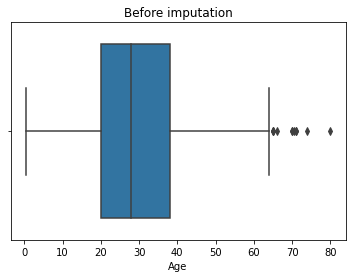

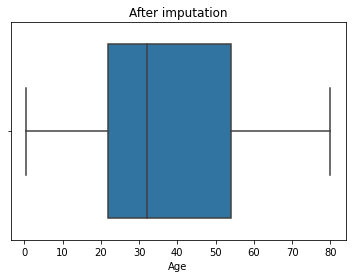

In [213]:
sns.boxplot(titanic['Age'])
plt.title('Before imputation')
plt.show()
sns.boxplot(titanic['Age'].fillna(titanic['Age'].mean() + 3 * titanic['Age'].std()))
plt.title('After imputation');

## 8) Iteratively modeling for each feature

It is very logical for a feature's value to depend on one feature or a combination of two or more features. In this approach, we

- Take a all the features or a subset of features(or all the features), call them `selected_features`
- For each `feature` in `selected_features`, set `y=feature` and `x=all_features_except_y`
- Do this for all other features in `selected_features`

In [192]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [195]:
IterativeImputer().fit_transform(titanic[['Pclass', 'Age', 'SibSp', 'Parch']])

array([[ 3.        , 22.        ,  1.        ,  0.        ],
       [ 1.        , 38.        ,  1.        ,  0.        ],
       [ 3.        , 26.        ,  0.        ,  0.        ],
       ...,
       [ 3.        , 21.03094419,  1.        ,  2.        ],
       [ 1.        , 26.        ,  0.        ,  0.        ],
       [ 3.        , 32.        ,  0.        ,  0.        ]])

By default, `IterativeImputer` uses <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html">BayesianRidge()</a> as a model to map `x` to `y`. You can the model using the `estimator` parameter. Note that `IterativeImputer` assumes that your data has been preprocessed and is in a non-string format. That's why I'm not using any string feature here.

## 9) Manual derivation

This approach is pretty similar to Iterative imputation but it works on our understanding of the dataset. Our intuition can also help in dealing with missing values. Say you're again looking at a survey data where one of the question says <i>"What is your age?"</i> and the other says <i>"Do you like Hip-Hop?"</i>.
<br>

There are missing values in the latter question.

We observe the following:

| Age Group    | % of people who like Hip-Hop |
|--------------|------------------------------|
| 20-25        | 90                           |
| 25-35        | 70                           |
| 35+          | 50                           |

Now, for rows with missing values, we check their age group and fill them randomly

For example, say 100 rows with missing values have ages between 20 and 25, then we can fill those NAs with this:

In [197]:
np.random.choice([0, 1], size=100, p=[0.1, 0.9])

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

## 10) KNN

We can also use K Nearest Neighbors for filling in the missing values. For each row with a missing value, we find its neighbors and aggregate those values for `k` neighbors that are closest to it.

In [199]:
from sklearn.impute import KNNImputer

In [207]:
KNNImputer(n_neighbors=3).fit_transform(titanic[['Pclass', 'Age', 'SibSp', 'Parch']])

array([[ 3., 22.,  1.,  0.],
       [ 1., 38.,  1.,  0.],
       [ 3., 26.,  0.,  0.],
       ...,
       [ 3., 18.,  1.,  2.],
       [ 1., 26.,  0.,  0.],
       [ 3., 32.,  0.,  0.]])

# References

- Kaggle's Titanic dataset: https://www.kaggle.com/c/titanic
- Krish Naik's Github: https://github.com/krishnaik06/Feature-Engineering-Live-sessions
- Scikit Learn's Impute module: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute